**Введение**

Добро пожаловать в проект анализа данных интернет-магазина "Стримчик"!

На данный момент перед нами стоит задача выявить ключевые закономерности, определяющие успешность игр. Это позволит нам принимать обоснованные решения, делая ставку на потенциально популярные продукты и эффективно планировать рекламные кампании. В нашем арсенале - данные до 2016 года, и представим, что мы находимся в декабре 2016 года, готовясь к кампании на 2017-й.

Особое внимание мы уделим аббревиатуре ESRB (Entertainment Software Rating Board), которая определяет возрастной рейтинг компьютерных игр. ESRB играет важную роль, классифицируя игры по возрастным категориям, таким образом, мы сможем анализировать, как эти рейтинги влияют на успешность продаж.

Предстоит исследование, направленное на поиск ключевых факторов в мире компьютерных игр, чтобы сделать наше предложение ещё привлекательнее для клиентов и укрепить нашу позицию в индустрии развлечений.


**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Изучение общей информации

Для начала подключим все необходимые библиотеки и откроем файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Предобработка данных

Для начала приведем к нижнему регистру названия столбцов:

In [5]:
data = data.rename(columns = {'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь преобразуем типы данных:

In [7]:
data['year'] = data['year'].astype(pd.Int64Dtype())
data['critic_score'] = data['critic_score'].astype(pd.Int64Dtype())

поменяли тип данных в year и critic_score на int

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
data = data.replace('tbd', np.nan)

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
data['user_score'] = data['user_score'].astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   Int64  
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


заменили tbd (рейтинг еще не определен) на пропуски и привели тип данных в user_score к float

Посмотрим пропуски:

In [13]:
data.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

Обнаружили, теперь обработаем

In [14]:
data['name'] = data['name'].fillna('unnamed')
data['genre'] = data['genre'].fillna('unnamed')

In [15]:
data['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
data.isna().sum()

name               0
platform           0
year             269
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

Избавились от пропусков в стобцах name и genre, заменив пропуск на unnamed, там где пропущен год мы так и оставим, тк не можем знать когда вышла та или иная игра, не будем трогать пропуски в трех последних стобцах, так как мы не знаем, какой рейтинг там поставили, возможно, эти игры даже не оценивали, поэтому ничего и не стоит, мы не можем заменить пропуски на ноль, поэтому оставим все как есть и продлжим работу с данными. Скорее всего пропуски в столбцах с рейтингом и оценками появились из-за того, что данные игры еще не оценивались либо эти данные были утеряны. Причина пропусков в столбце year скорее всего в том, что эти данные так же были утеряны.

добавим столбец с суммарными продажами

In [18]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [19]:
data.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


проверим на дубликаты

In [20]:
data.duplicated().sum()

0

Теперь проверим неявные дубликаты.

In [21]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unnamed'], dtype=object)

In [23]:
data['year'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [24]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Неявных дубликатов не обнаружено

In [25]:
# Комментарий ревьюера 2
temp = data.copy()
temp[temp[['name', 'platform','year']].duplicated(keep=False)]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E,2.56
659,unnamed,GEN,1993,unnamed,1.78,0.53,0.00,0.08,<NA>,NaN,NaN,2.39
14244,unnamed,GEN,1993,unnamed,0.00,0.00,0.03,0.00,<NA>,NaN,NaN,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E,0.01


Вывод: мы ознакомились с датасетом, поменяли типы данных, избавились от дубликатов и пропусков, добавили новый столбец с суммой продаж со всех регионов, заменили названия на нижний регистр.

Тут все хорошо

In [26]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16715 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  Int64  
 3   genre         16715 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   Int64  
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
 11  sales         16715 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'unnamed' 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
-----------

#### Исследовательский анализ данных

сколько игра выпускалось за разные периоды:

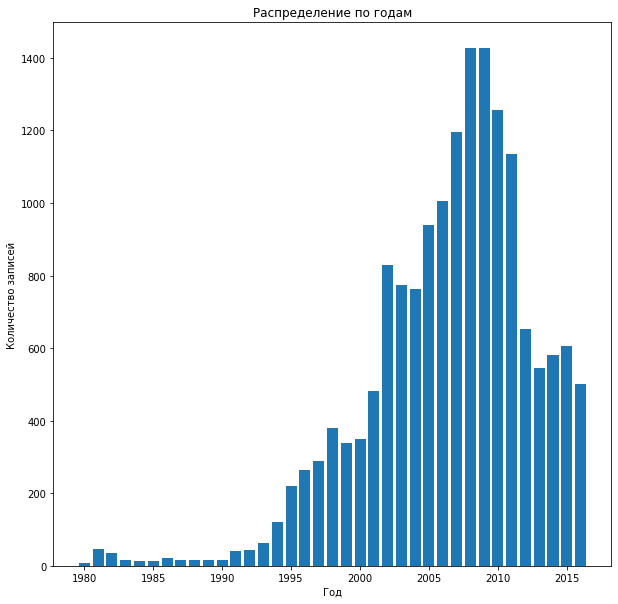

In [27]:
plt.figure(figsize=(10, 10))
plt.bar(data['year'].value_counts().index, data['year'].value_counts())
plt.title('Распределение по годам')
plt.xlabel('Год')
plt.ylabel('Количество записей')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Пожалуй самы важный промежуток это с 2000 по 2015 год, когда игры активно выпускались

Посмотрим платформы с наибольшим кол-вом продаж:

In [28]:
top = data.pivot_table(index = 'platform', 
                       values = 'sales', 
                       aggfunc = 'sum').sort_values(by = 'sales', ascending = False).head(10)
top

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


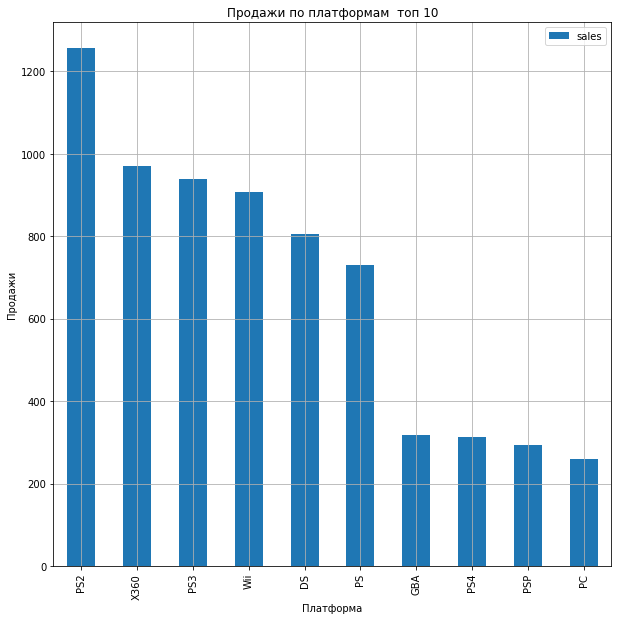

In [29]:
ax = top.plot.bar(y='sales', figsize = (10,10), grid = True)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам  топ 10')
plt.show()

теперь посмотри продажи на этих платформах по годам

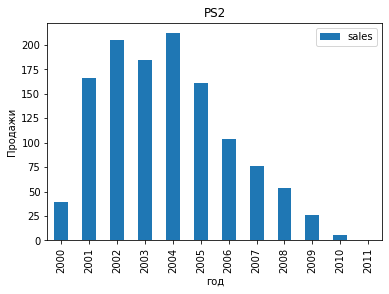

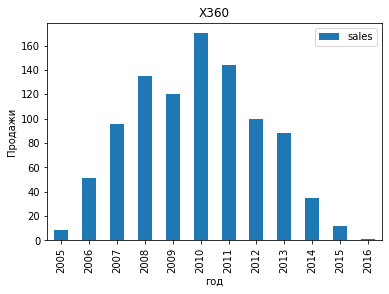

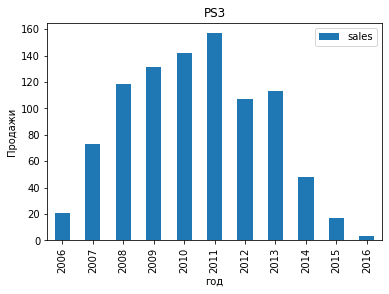

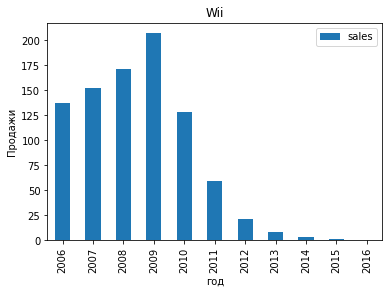

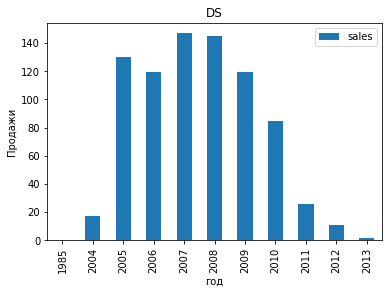

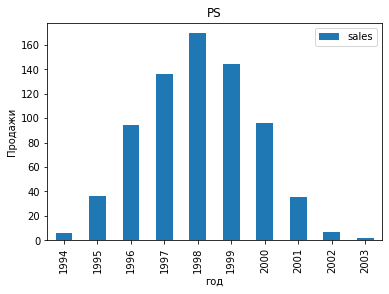

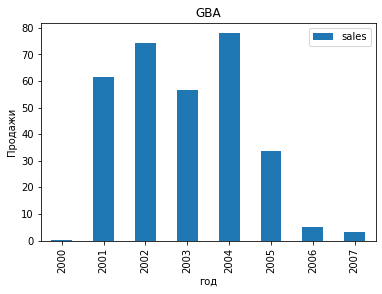

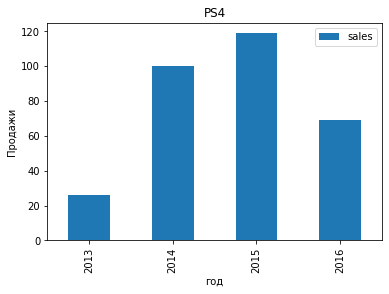

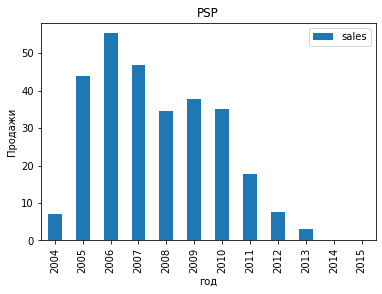

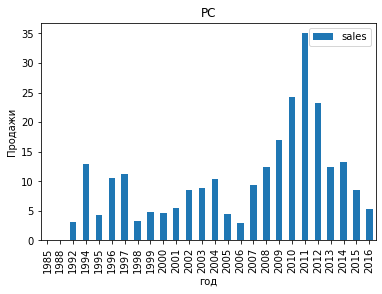

In [30]:
first_column_values = top.index.get_level_values(0)
for platform in first_column_values:
    data.loc[data['platform'] == platform].pivot_table(index = 'year', values = 'sales', aggfunc = 'sum').plot.bar(y='sales')
    plt.ylabel('Продажи')
    plt.title(platform)
    plt.xlabel('год')
    plt.show()

Вывод: обычно платформы живут около 10 лет, чаще всего они начала появляться начиная с 2006 года, так как нам нужен прогноз на 2017 год, то будем опираться на данные с 2014 по 2016 год.

In [31]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

так как нам не стоит брать данные за неактуальный период, оставим данные только для промежутка с 2014 года по 2016:

In [32]:
data_actual = data.loc[data['year'] > 2013]
data_actual = data_actual.reset_index(drop = True)
data_actual['year'].unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

In [33]:
data_actual.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98


теперь рассмотрим какие платформы лидируют по продажам за 2014 - 2016:

In [34]:
top2 = (data_actual.pivot_table(index = 'platform', 
                       values = 'sales', 
                       aggfunc = 'sum')
                      .sort_values(by = 'sales', ascending = False).head(20))
top2

,sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


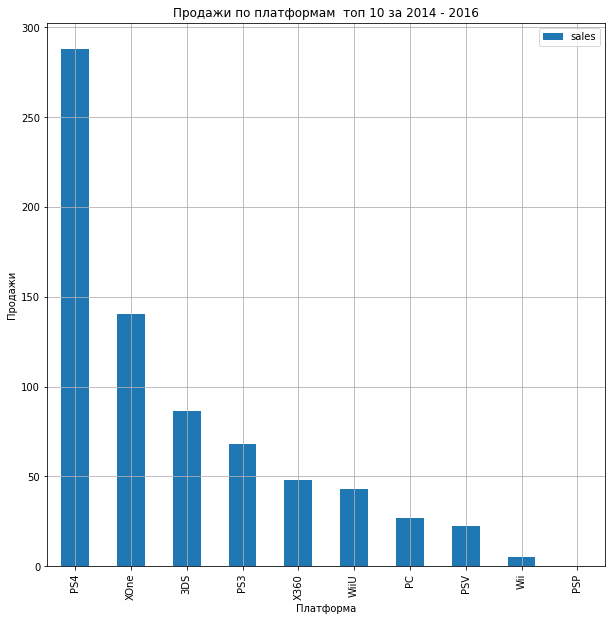

In [35]:
ax = top2.plot.bar(y='sales', figsize = (10,10), grid = True)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам  топ 10 за 2014 - 2016')
plt.show()

рассмотрим теперь каждую платформу по отдельности

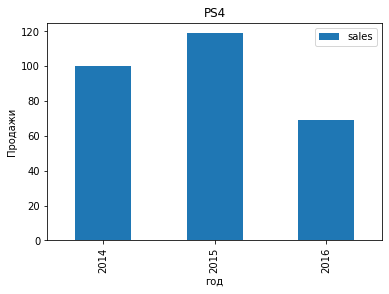

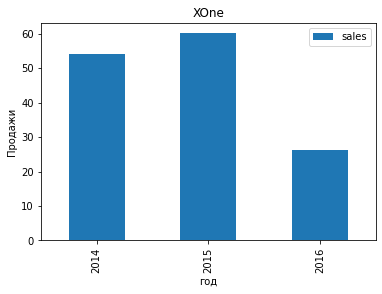

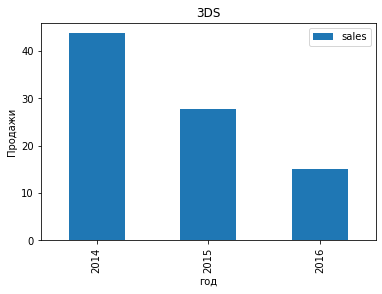

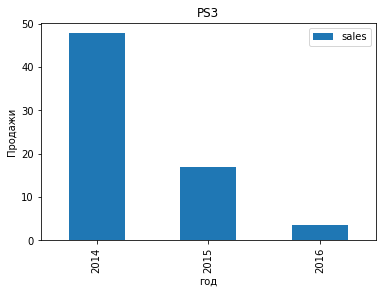

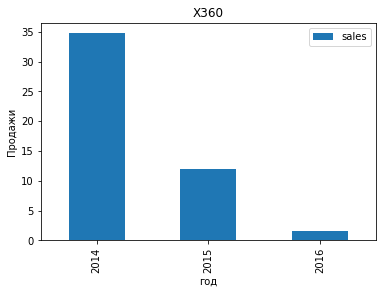

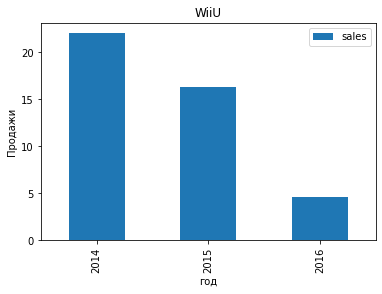

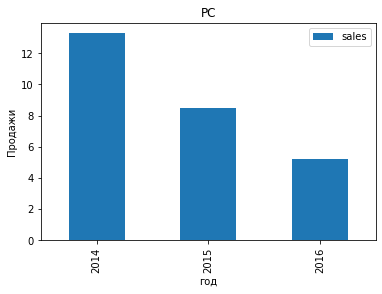

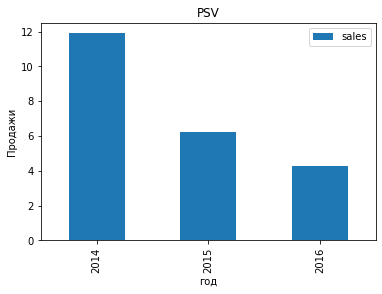

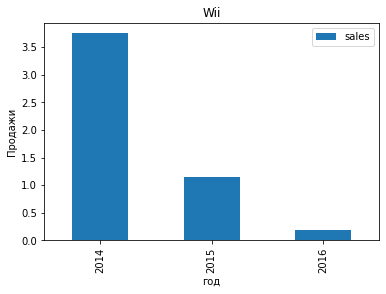

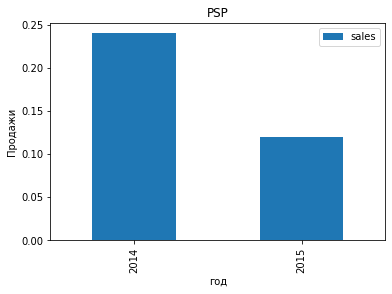

In [36]:
first_column_values = top2.index.get_level_values(0)
for platform in first_column_values:
    data_actual.loc[data_actual['platform'] == platform].pivot_table(index = 'year', values = 'sales', aggfunc = 'sum').plot.bar(y='sales')
    plt.ylabel('Продажи')
    plt.title(platform)
    plt.xlabel('год')
    plt.show()

судя по графикам, можно выделить пару платформ, которые хоть как-то держатся на рынке, к таким относятся PS4, PC, XOne, 3DS все остальные платформы можно считать устаревшими и вышедшими из тренда, они не будут потенциально прибыльными.

Построим график ящик с усами для этих платформ.

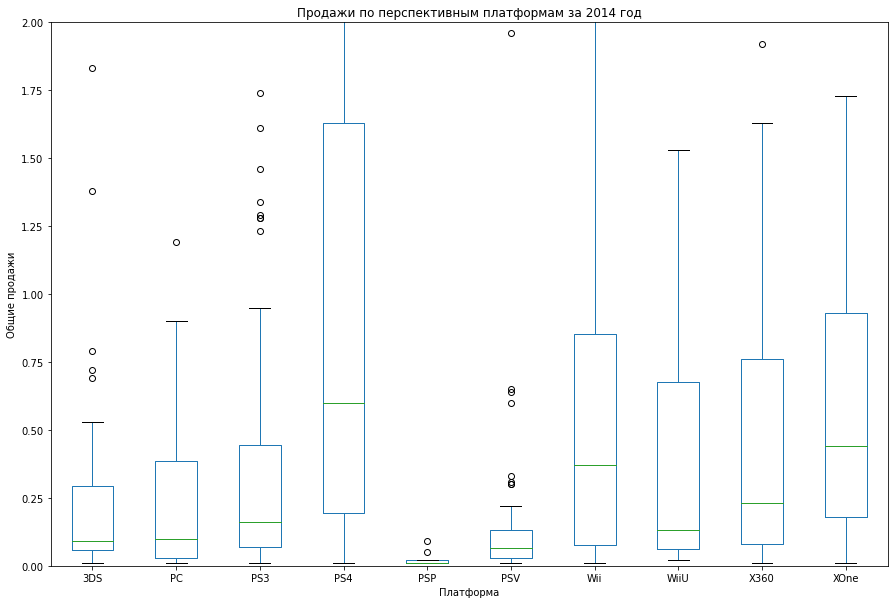

In [37]:
(data_actual.loc[data_actual['year'] == 2014].pivot_table(index = 'name',
                         columns = 'platform', 
                         values = 'sales', 
                         aggfunc = 'sum').plot(kind='box', ylim=(0,2), figsize = (15, 10)))
plt.ylabel('Общие продажи')
plt.title('Продажи по перспективным платформам за 2014 год')
plt.xlabel('Платформа')
plt.show()

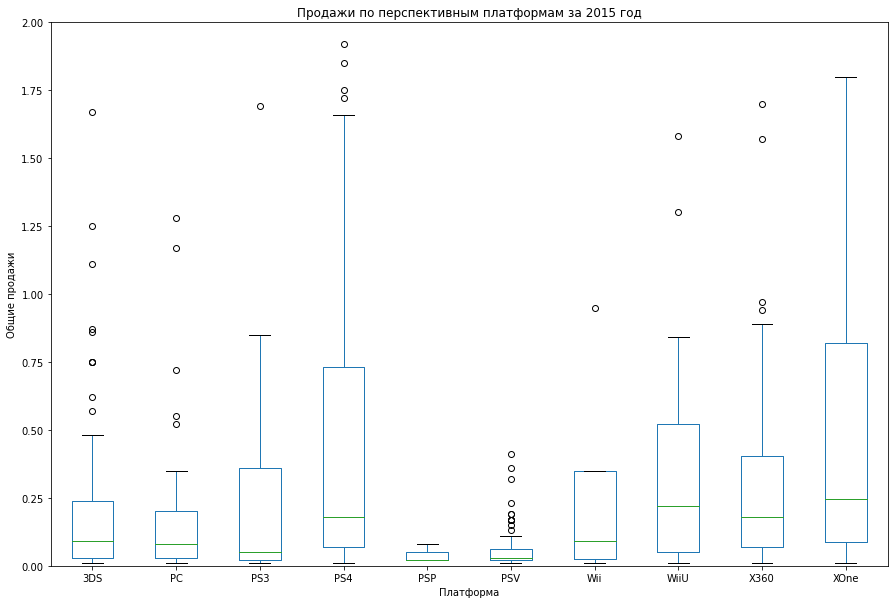

In [38]:
(data_actual.loc[data_actual['year'] == 2015].pivot_table(index = 'name',
                         columns = 'platform', 
                         values = 'sales', 
                         aggfunc = 'sum').plot(kind='box', ylim=(0,2), figsize = (15, 10)))
plt.ylabel('Общие продажи')
plt.title('Продажи по перспективным платформам за 2015 год')
plt.xlabel('Платформа')
plt.show()

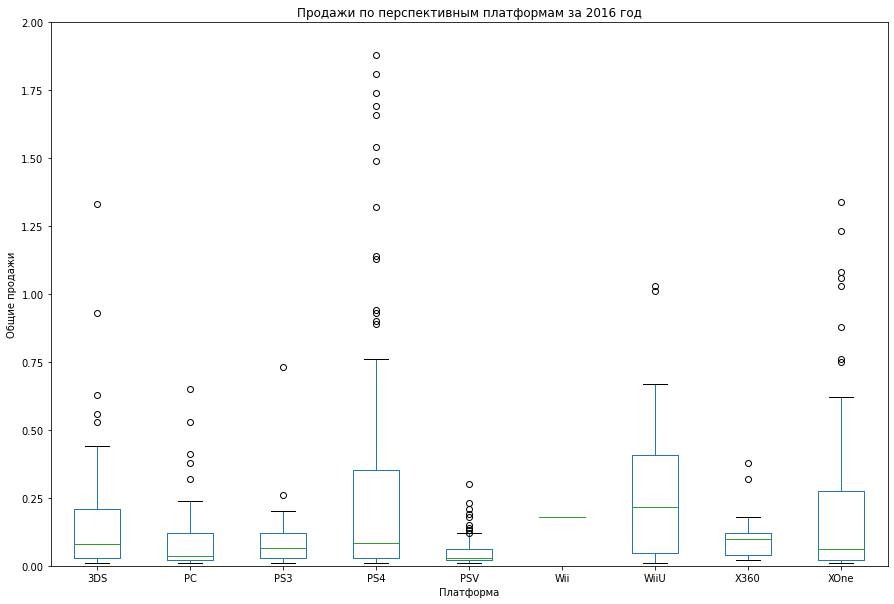

In [39]:
(data_actual.loc[data_actual['year'] == 2016].pivot_table(index = 'name',
                         columns = 'platform', 
                         values = 'sales', 
                         aggfunc = 'sum').plot(kind='box', ylim=(0,2), figsize = (15, 10)))
plt.ylabel('Общие продажи')
plt.title('Продажи по перспективным платформам за 2016 год')
plt.xlabel('Платформа')
plt.show()

Мы видим в целом очень хорошие медианные показатели у выбранных нами платформ.

Возьмем платформу PS4 и другие и рассмотрим как отзывы влияют на продажи, рассчитав корреляцию и построив график рассеивания.

1 PS4
              critic_score  user_score     sales
critic_score      1.000000    0.546434  0.402661
user_score        0.546434    1.000000 -0.040132
sales             0.402661   -0.040132  1.000000


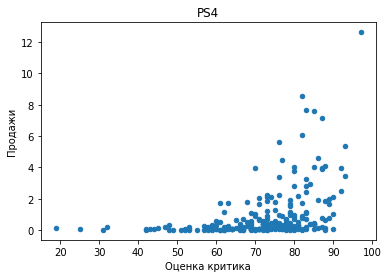

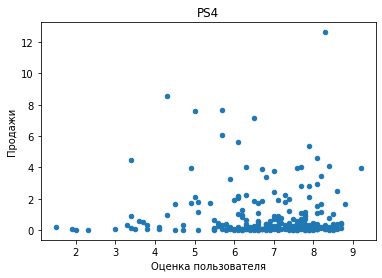

------------------------------------------------------------------
2 3DS
              critic_score  user_score     sales
critic_score      1.000000    0.862485  0.314117
user_score        0.862485    1.000000  0.215193
sales             0.314117    0.215193  1.000000


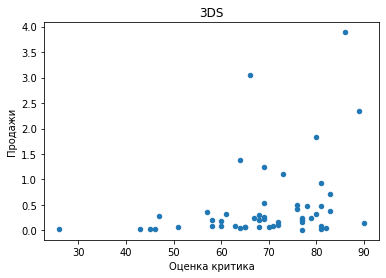

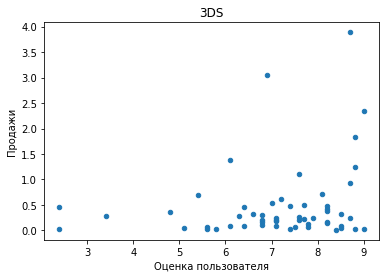

------------------------------------------------------------------
3 XOne
              critic_score  user_score     sales
critic_score      1.000000    0.440977  0.428677
user_score        0.440977    1.000000 -0.070384
sales             0.428677   -0.070384  1.000000


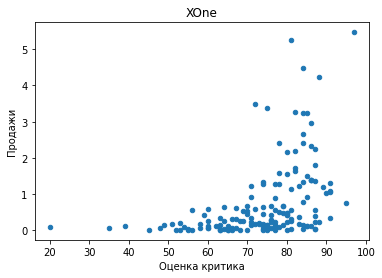

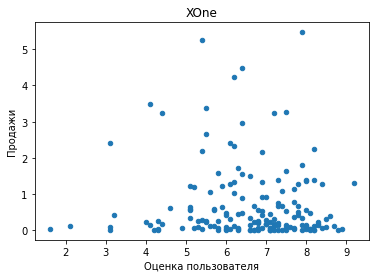

------------------------------------------------------------------
4 WiiU
              critic_score  user_score     sales
critic_score      1.000000    0.763536  0.370201
user_score        0.763536    1.000000  0.407926
sales             0.370201    0.407926  1.000000


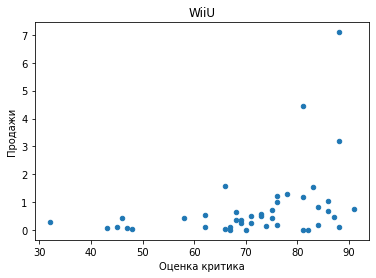

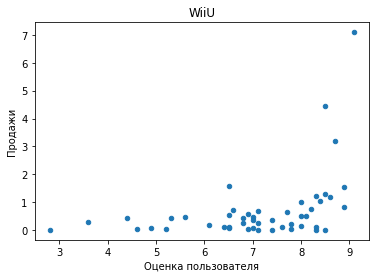

------------------------------------------------------------------
5 PS3
              critic_score  user_score     sales
critic_score      1.000000    0.693445  0.446575
user_score        0.693445    1.000000 -0.166761
sales             0.446575   -0.166761  1.000000


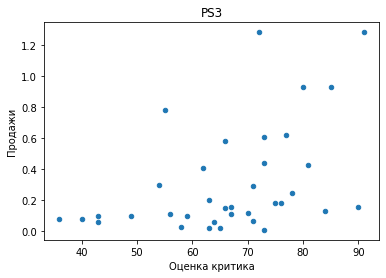

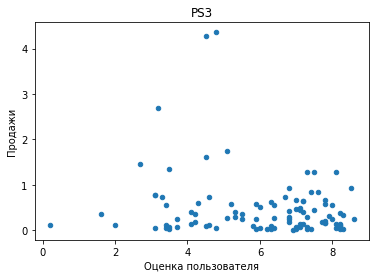

------------------------------------------------------------------


In [40]:
k = 1
for platform in data_actual['platform'].unique():
    print(k, platform)
    print(data_actual[['critic_score','user_score', 'sales']].loc[data_actual['platform'] == platform].corr())
    data_actual.loc[data_actual['platform'] == platform].plot(y = 'sales', x = 'critic_score', kind = 'scatter')
    plt.ylabel('Продажи')
    plt.title(platform)
    plt.xlabel('Оценка критика')
    plt.show()
    data_actual.loc[data_actual['platform'] == platform].plot(y = 'sales', x = 'user_score', kind = 'scatter')
    plt.ylabel('Продажи')
    plt.title(platform)
    plt.xlabel('Оценка пользователя')
    plt.show()
    print('------------------------------------------------------------------')
    k += 1
    if k == 6:
        break

по таблице корреляции мы видим, что продажи не зависят от отзывов пользователей, но немного зависят от отзывов критиков, чем выше оценка, тем больше продаж, думаю продажи игра на остальных платформах имеют те же свойства, но не стоит забывать об актуальности самой платформы.

Теперь рассмотрим как жанры игр влияют на стоимость.

1 PS4
         sales
genre         
Action   91.62
Shooter  78.46
Sports   50.01


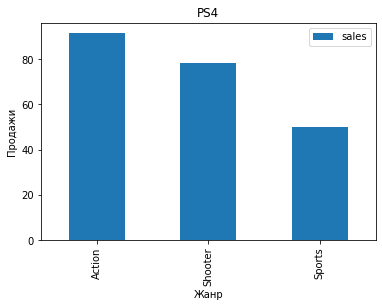

----------------------------------------------------------------------------------------------
2 3DS
              sales
genre              
Role-Playing  40.02
Action        22.06
Fighting       8.10


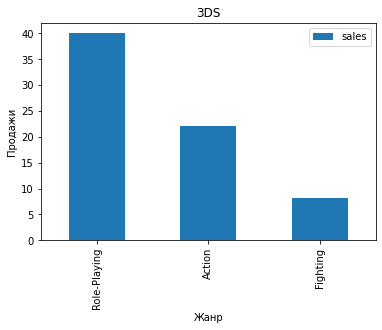

----------------------------------------------------------------------------------------------
3 XOne
         sales
genre         
Shooter  55.39
Action   31.06
Sports   23.68


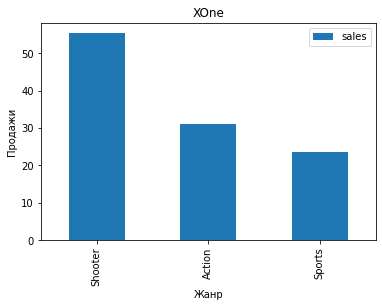

----------------------------------------------------------------------------------------------
4 WiiU
          sales
genre          
Action     9.99
Racing     7.09
Platform   6.87


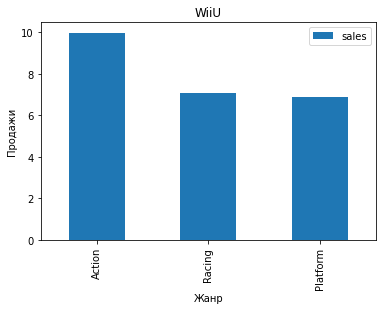

----------------------------------------------------------------------------------------------
5 PS3
         sales
genre         
Action   18.10
Sports   17.47
Shooter  12.17


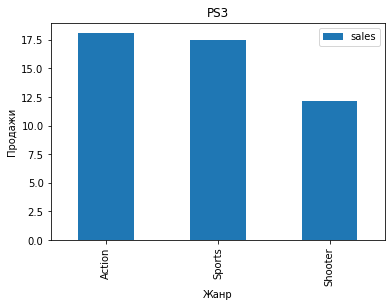

----------------------------------------------------------------------------------------------
6 X360
         sales
genre         
Shooter  13.66
Sports   13.40
Action   12.33


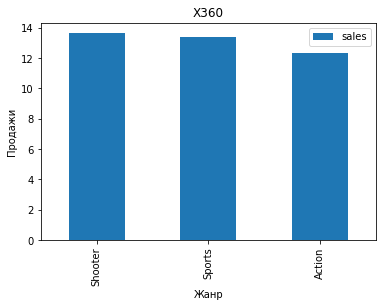

----------------------------------------------------------------------------------------------
7 PC
            sales
genre            
Simulation   6.59
Shooter      5.79
Action       5.34


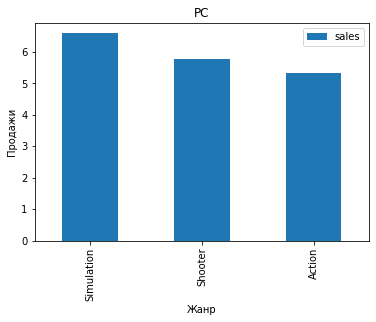

----------------------------------------------------------------------------------------------
8 Wii
        sales
genre        
Misc     3.14
Action   1.19
Sports   0.56


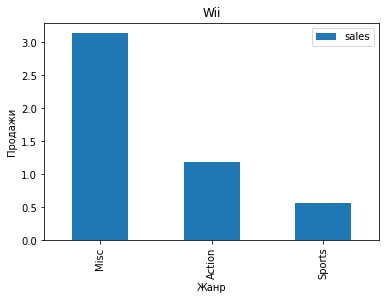

----------------------------------------------------------------------------------------------
9 PSV
              sales
genre              
Action         7.47
Role-Playing   6.10
Misc           3.43


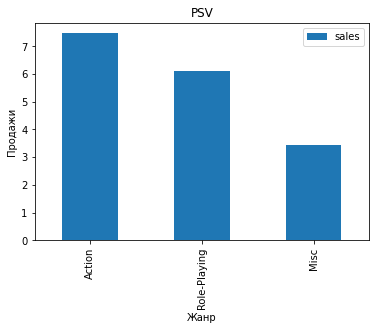

----------------------------------------------------------------------------------------------
10 PSP
           sales
genre           
Action      0.20
Sports      0.09
Adventure   0.05


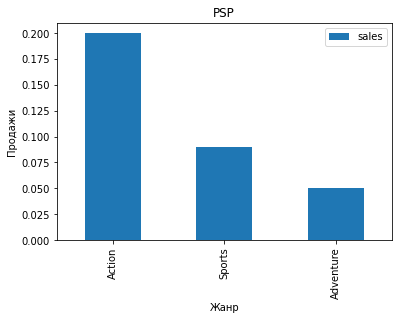

----------------------------------------------------------------------------------------------


In [41]:
k = 1
for platform in data_actual['platform'].unique():
    print(k, platform)
    print(data_actual.loc[data_actual['platform'] == platform].pivot_table(index = 'genre', values = 'sales', aggfunc = 'sum').sort_values(by = 'sales', ascending = False).head(3))
    (data_actual.loc[data_actual['platform'] == platform].pivot_table(index = 'genre', values = 'sales', aggfunc = 'sum').sort_values(by = 'sales', ascending = False).head(3).plot(y = 'sales', kind = 'bar'))
    plt.ylabel('Продажи')
    plt.title(platform)
    plt.xlabel('Жанр')
    plt.show()
    print('----------------------------------------------------------------------------------------------')
    k += 1

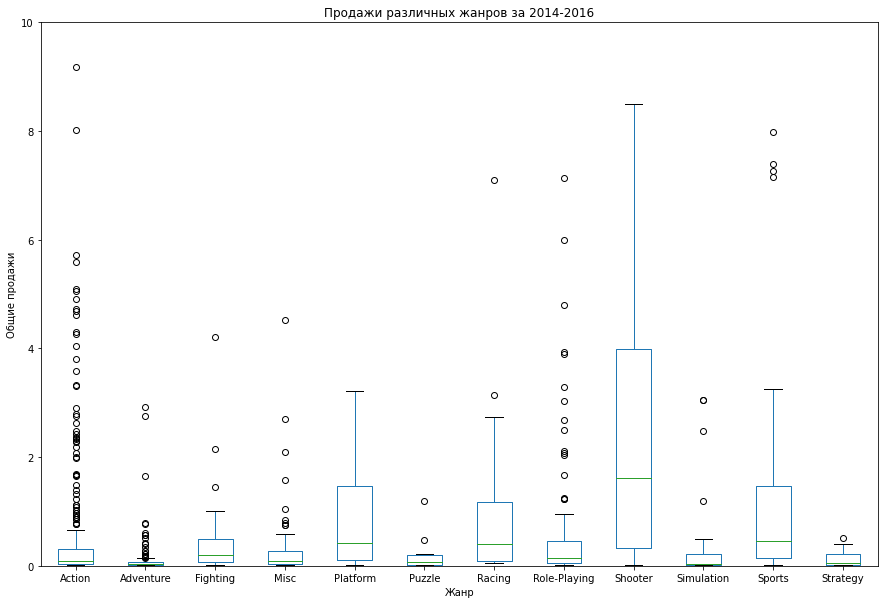

In [42]:
(data_actual.pivot_table(index = 'name',
                         columns = 'genre', 
                         values = 'sales', 
                         aggfunc = 'sum').plot(kind='box', ylim=(0,10), figsize = (15, 10)))
plt.ylabel('Общие продажи')
plt.title('Продажи различных жанров за 2014-2016')
plt.xlabel('Жанр')
plt.show()

мы видим, что самыми прибыльными являются такие жанры как Sports, Shooter, Platform, их стоит взять на заметку, возможно они так же будут приносить большую прибыль и в 2017 году. Что касается самых низкоприбыльных жанров, то к таким относятся Puzzle и Adventure, скорее всего там мало экшена и такое не привлекает большое количество пользователей.

####  Портрет пользователя каждого региона

будем опираться на актуальные данные с 2014 - 2016 год.

рассмотрим самые популярные платформы в каждом регионе:

*Начнем с Северной Америкики*

In [43]:
data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Мы видим, что преобладает по продажам американская консоль X360, а так же видим что в Северной Америке довольно популярны такие платформы как Wii, PS3, DS, PS2.

*Европа:*

In [44]:
data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


Мы видим что в Европе преобладает PS3 и X360, похоже что PS4 только набирает популярность там и стоит обратить на это внимание

*Япония:*

In [45]:
data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Вы видим, что в японии в основном преобладают японские консоли и по сравнению с другими регионами, в Японии продажи ниже

Вывод: больше всего приносит прибыль американское комьюнити, с консолью X360 в топе, а меньше всего играют в игры в Японии, но это скорее всего связано с ее населением

Теперь рассмотрим жанры в различных регионах по тому же принципу:

*Северная Америка:*

In [46]:
data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


*Европа:*

In [47]:
data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


*Япония:*

In [48]:
data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


*Вывод:* можно заметить, что топ жанров в Америке и в Европе очень похож, самым прибыльным жанром оказался Action, кстати в Японии он также занимает второе место, поэтому стоит обратить на это внимание и можно предположить, что качественный Action в 2017 принесет хорошую прибыль, вне зависимости от региона.

*Влияет ли рейтинг ESRB на продажи в отдельном регионе?* - Давайте точно так же составим таблицу для каждого региона, на которой сразу станет ясно, влияет ли этот рейтинг на продажи игр.


*Северная Америка:*

In [49]:
data_actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head(10)

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


*Европа:*

In [50]:
data_actual.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head(10)

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


*Япония:*

In [51]:
data_actual.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head(10)

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


Да, рейтинг влияет на продажи в отдельных регионах. рейтинг EC продавался только в Америке, а рейтинг RP только в европе.

In [52]:
# Комментарий ревьюера
temp = data_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

749 0.443457667258733


T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

#### Гипотезы

In [53]:
Action = data_actual[(data_actual['genre'] == 'Action') &  (data_actual['user_score'] > 0)]['user_score']
Sports = data_actual[(data_actual['genre'] == 'Sports') &  (data_actual['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937


Нулевая гипотеза Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [54]:
results = (st.ttest_ind(data_actual.loc[(data_actual['platform'] == 'XOne') & (data_actual['user_score'] > 0 )]['user_score'],
                        data_actual.loc[(data_actual['platform'] == 'PC') & (data_actual['user_score'] > 0)]['user_score']))
alpha = 0.01
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.10450507919348415
Не удалось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC действительно близки по значениям.

Гипотеза 2:

Нулевая: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы.

Альтернативная: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различны.

In [55]:
results = (st.ttest_ind(data_actual.loc[(data_actual['genre'] == 'Action') & (data_actual['user_score'] > 0 )]['user_score'],
                        data_actual.loc[(data_actual['genre'] == 'Sports') & (data_actual['user_score'] > 0)]['user_score'], equal_var = False))
alpha = 0.01
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различны.

#### Вывод:

    Итак, была проделана большая работа по анализу данных для выявления закономерностей определяющих успешность игры. Для начала мы ознакомились с датасетом, поменяли типы данных, избавились от дубликатов и пропусков, добавили новый столбец с суммой продаж со всех регионов, заменили названия на нижний регистр. Затем мы начали наш исследовательский анализ данных, мы выяснили что за период с 2008-2010 год выпустилось наибольшее кольчество игр, нашли две платформы, с наибольшим кол-вом продаж к ним относятся PS2 и X360, затем избавились от неактуальных данных и оставили данные за 2015-2016 год, когда начали выпускать большое колличество различных игр. Нашли три платформы, которые потенциально могут принести прибыль в 2017 году, этими платформами являются: PS4, PC, XOne, 3DS. А среди самых прибыльных жанров можно выделить следующие: Sports, Shooter, Platform, а меньше всего прибыль приносят Adventure и Puzzle. Затем, используя сводные таблицы, мы составили портер каждого региона и нашли популярные платформы и жанры в этих регионах. И наконец, пятым шагом, мы опровергли две гипотезы, а именно: 
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    Были отвергнуты.
    Таким образом, мы нашли потенциально прибыльные жанры и платформы в различных регионах, которые могут выстрельнуть в 2017 году, стоит обратить внимание на платформы PS4 и PC, а жанр Sports, Shooter, Platform!